In [ ]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 2: Load Data
df = pd.read_csv("healthcare_dataset.csv")
print("Shape:", df.shape)
df.head()


Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Step 3: Data Cleaning & Preprocessing
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Normalize names
df['Name'] = df['Name'].str.lower()

# Calculate length of stay
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Sort for readmission detection
df.sort_values(by=['Name', 'Date of Admission'], inplace=True)

# Create next admission and readmission within 30 days flag
df['Next_Admission'] = df.groupby('Name')['Date of Admission'].shift(-1)
df['Days_to_Next_Admission'] = (df['Next_Admission'] - df['Discharge Date']).dt.days
df['Readmitted'] = df['Days_to_Next_Admission'].apply(lambda x: 1 if pd.notnull(x) and 0 < x <= 30 else 0)

# Drop helper columns not needed for modeling
df.drop(['Next_Admission', 'Days_to_Next_Admission'], axis=1, inplace=True)

print("Readmitted value counts:\n", df['Readmitted'].value_counts())


Readmitted value counts:
 Readmitted
0    54938
1      562
Name: count, dtype: int64


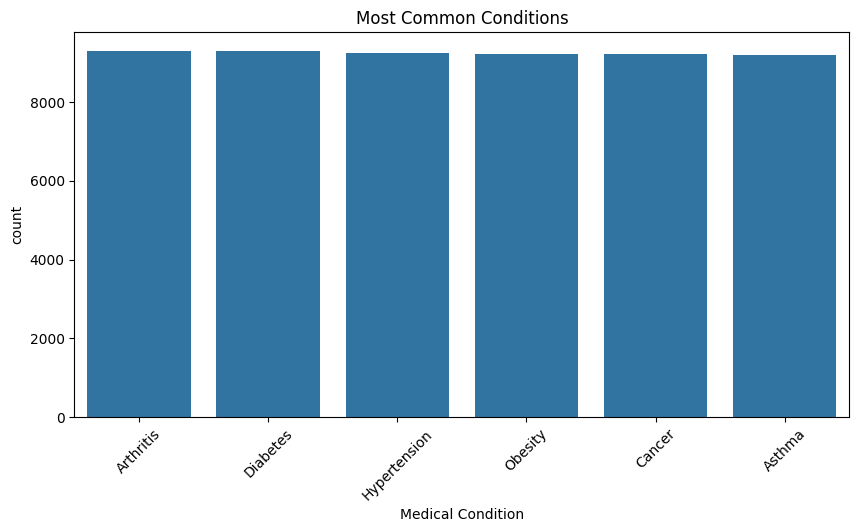

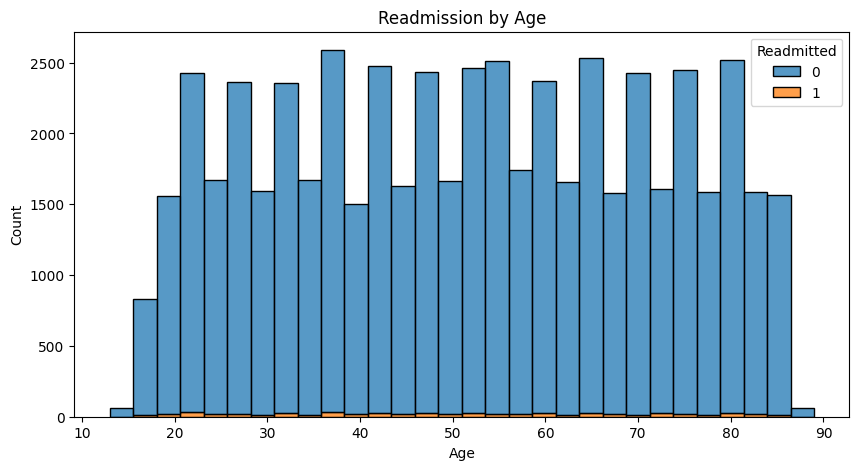

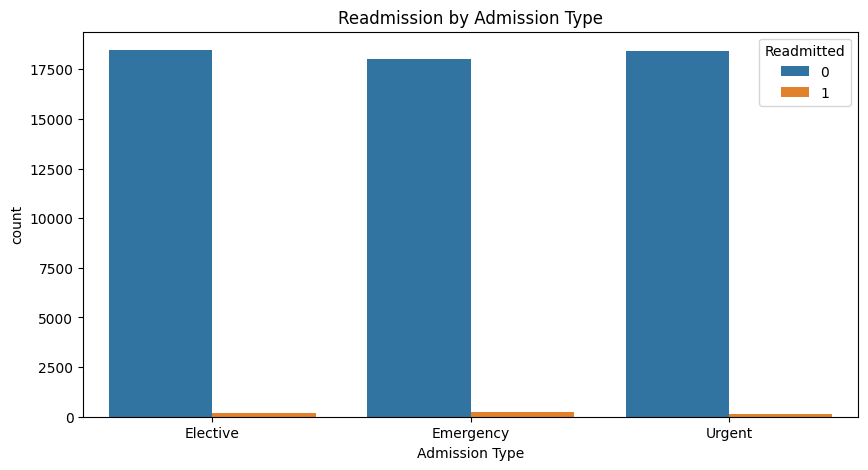

In [ ]:
# Step 4: EDA – Visualize key trends
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title("Most Common Conditions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Readmitted', multiple='stack', bins=30)
plt.title("Readmission by Age")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Admission Type', hue='Readmitted')
plt.title("Readmission by Admission Type")
plt.show()


In [ ]:
# Step 5: Feature Engineering
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

# Count prior admissions
df['Prior_Admissions'] = df.groupby('Name').cumcount()

# Final features
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
            'Billing Amount', 'Length_of_Stay', 'Medication', 'Test Results', 'Prior_Admissions']

X = df[features]
y = df['Readmitted']


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# Step 8: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[10980     1]
 [  119     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10981
           1       0.00      0.00      0.00       119

    accuracy                           0.99     11100
   macro avg       0.49      0.50      0.50     11100
weighted avg       0.98      0.99      0.98     11100

ROC AUC Score: 0.4999544668063018


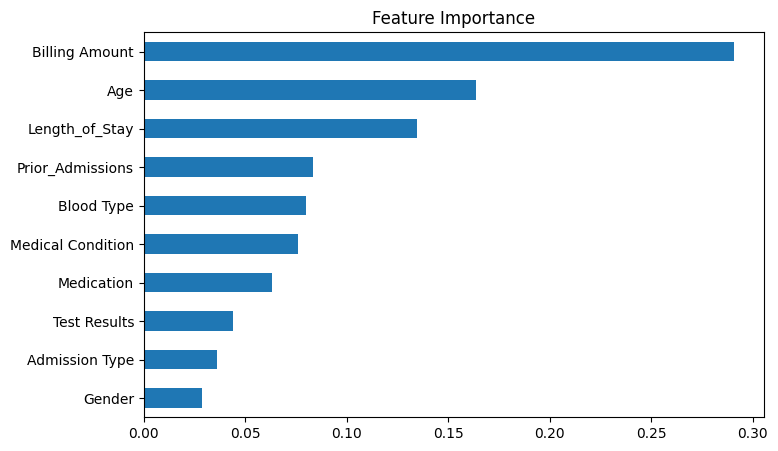

In [ ]:
# Step 9: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance")
plt.show()


Shape: (55500, 15)


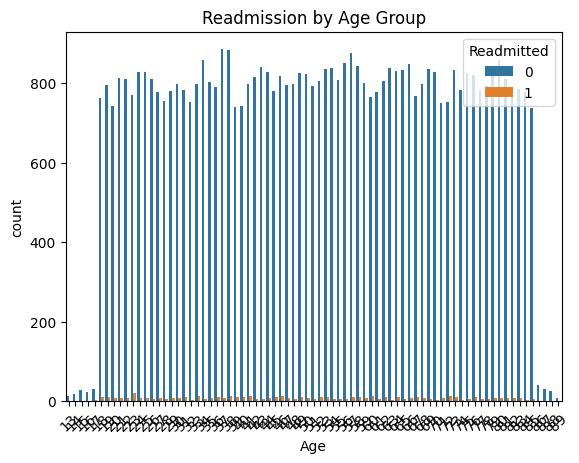

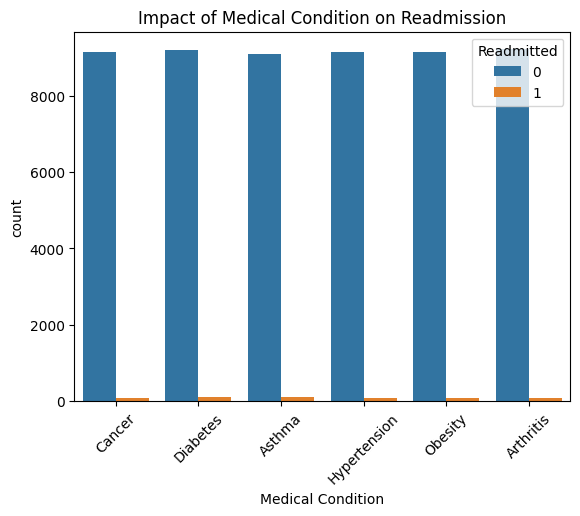

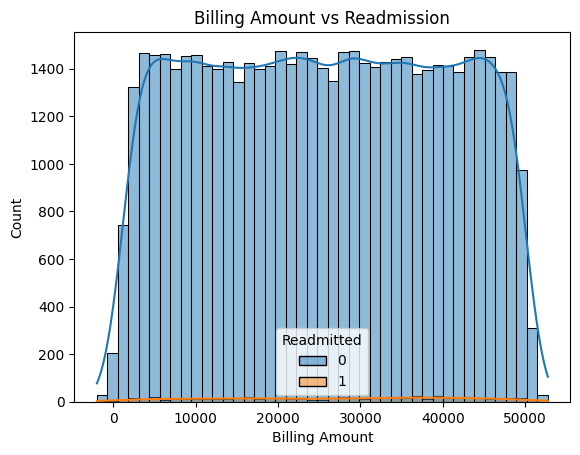

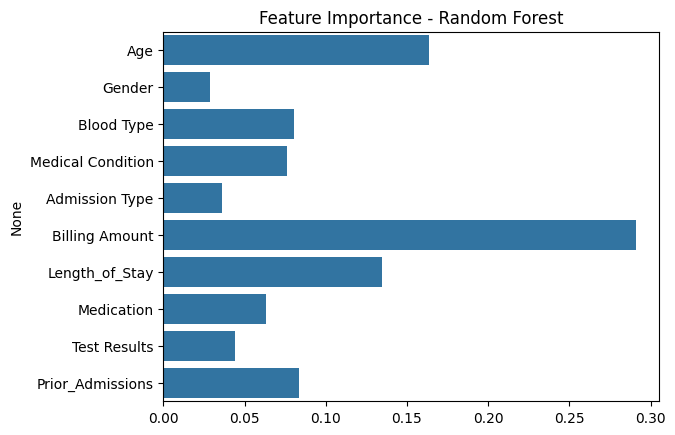

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load Data

df = pd.read_csv("healthcare_dataset.csv")
print("Shape:", df.shape)
df.head()
# Data Cleaning & Preprocessing
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Name'] = df['Name'].str.lower()
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.sort_values(by=['Name', 'Date of Admission'], inplace=True)
df['Next_Admission'] = df.groupby('Name')['Date of Admission'].shift(-1)
df['Days_to_Next_Admission'] = (df['Next_Admission'] - df['Discharge Date']).dt.days
df['Readmitted'] = df['Days_to_Next_Admission'].apply(lambda x: 1 if pd.notnull(x) and 0 < x <= 30 else 0)
df.drop(['Next_Admission', 'Days_to_Next_Admission'], axis=1, inplace=True)


# Feature Engineering
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
df_encoded = df.copy()
df_encoded[cat_cols] = df_encoded[cat_cols].apply(LabelEncoder().fit_transform)
df_encoded['Prior_Admissions'] = df_encoded.groupby('Name').cumcount()
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
            'Billing Amount', 'Length_of_Stay', 'Medication', 'Test Results', 'Prior_Admissions']
X = df_encoded[features]
y = df_encoded['Readmitted']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Count of patients by age group and readmission status
sns.countplot(x='Age', hue='Readmitted', data=df)
plt.title('Readmission by Age Group')
plt.xticks(rotation=45)
plt.show()

# Check readmission rate by medical condition
sns.countplot(x='Medical Condition', hue='Readmitted', data=df)
plt.title('Impact of Medical Condition on Readmission')
plt.xticks(rotation=45)
plt.show()

# Visualize billing amount distribution for readmitted vs non-readmitted
sns.histplot(data=df, x='Billing Amount', hue='Readmitted', kde=True)
plt.title('Billing Amount vs Readmission')
plt.show()

# Barplot for feature importance (already trained model)
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.show()

Shape: (55500, 17)


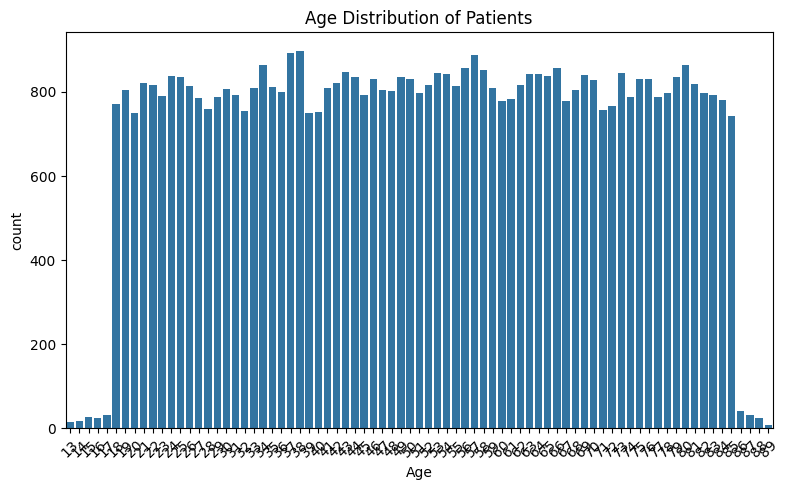

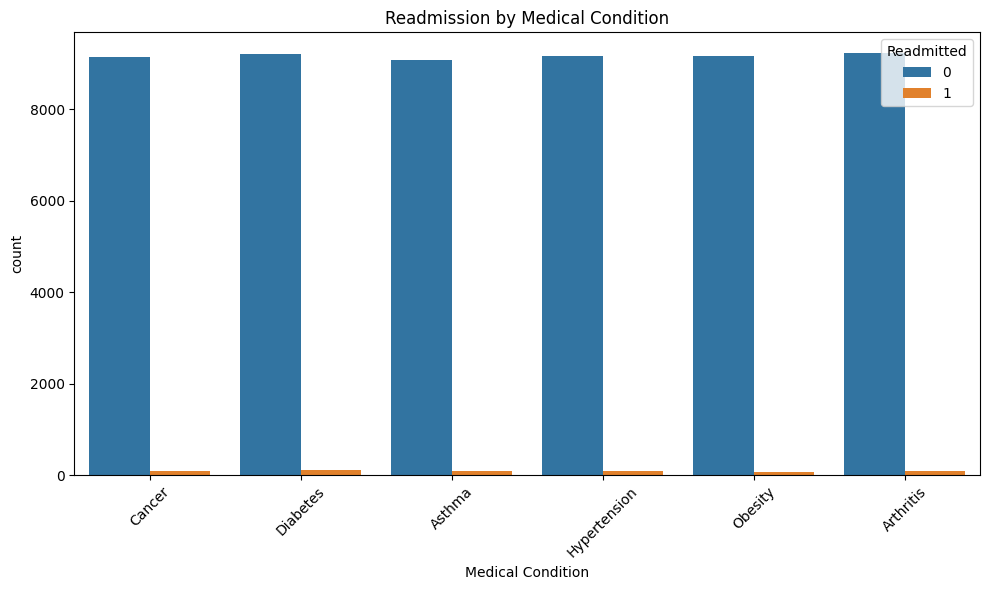

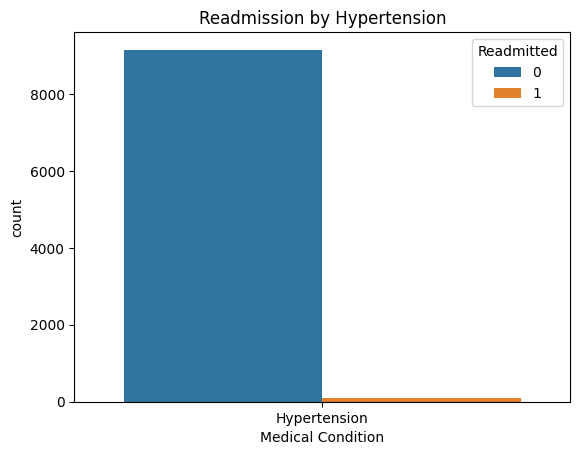

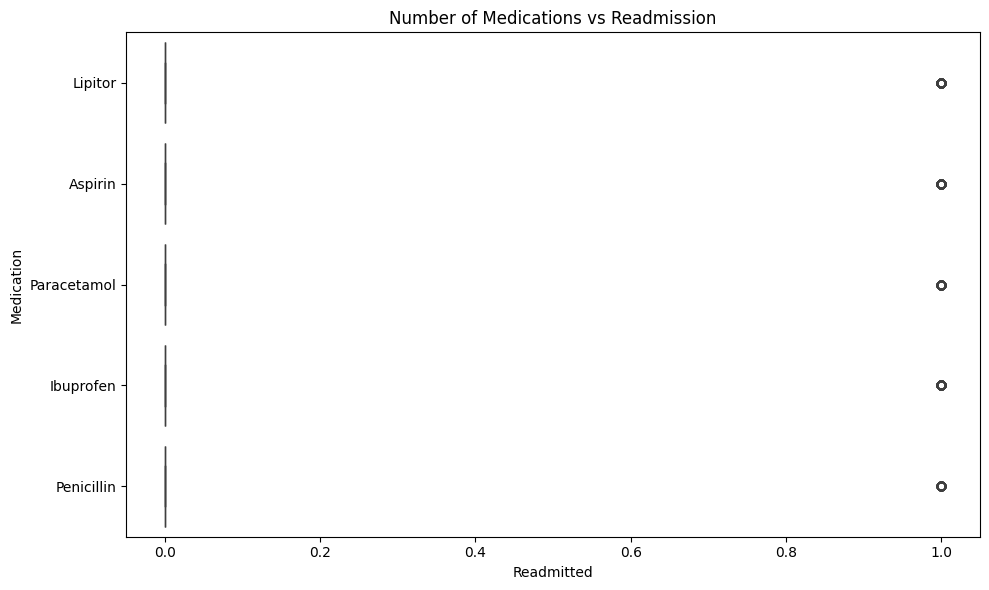

In [ ]:
#Enhanced EDA + Interpretations

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data (replace with your actual df)
df = pd.read_csv("healthcare_dataset.csv")

# Data Cleaning & Preprocessing
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Name'] = df['Name'].str.lower()
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.sort_values(by=['Name', 'Date of Admission'], inplace=True)
df['Next_Admission'] = df.groupby('Name')['Date of Admission'].shift(-1)
df['Days_to_Next_Admission'] = (df['Next_Admission'] - df['Discharge Date']).dt.days
df['Readmitted'] = df['Days_to_Next_Admission'].apply(lambda x: 1 if pd.notnull(x) and 0 < x <= 30 else 0)
df.drop(['Next_Admission', 'Days_to_Next_Admission'], axis=1, inplace=True)


print("Shape:", df.shape)
df.head()  # Make sure this is your preprocessed file

# 1. Age Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df, order=sorted(df['Age'].unique()))
plt.title('Age Distribution of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👉 Observation:
# - Note which age groups are most common.
# - Highlight if readmission is more frequent in older age groups.

# 2. Readmission vs Medical Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', hue='Readmitted', data=df)
plt.title('Readmission by Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 👉 High glucose level often leads to higher readmission.

# 3. Comorbidity Impact (e.g., Hypertension)
sns.countplot(x='Medical Condition', hue='Readmitted', data=df[df['Medical Condition'] == 'Hypertension'])
plt.title('Readmission by Hypertension')
plt.show()

# 👉 Patients with hypertension have higher readmission frequency.

# 4. Number of Medications vs Readmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='Readmitted', y='Medication', data=df)
plt.title('Number of Medications vs Readmission')
plt.tight_layout()
plt.show()

# 👉 More medications → higher likelihood of complications/readmission

# Save this EDA section in your notebook with comments like above

# Then we will move to: Evaluation Metrics + Risk Recommendation next

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10981
           1       0.00      0.00      0.00       119

    accuracy                           0.99     11100
   macro avg       0.49      0.50      0.50     11100
weighted avg       0.98      0.99      0.98     11100

✅ Accuracy Score: 0.9891891891891892


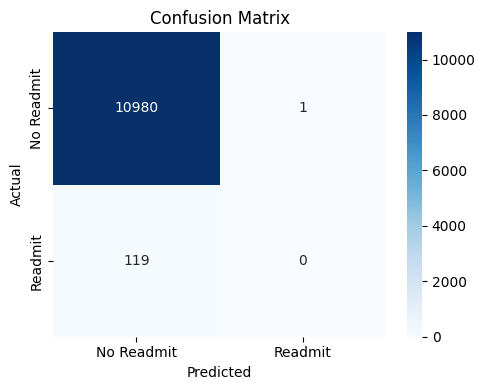

,Actual,Predicted,Readmission_Prob,Risk_Level
401,0,0,0.02,Low Risk
4544,0,0,0.01,Low Risk
12333,0,0,0.00,Low Risk
25621,0,0,0.01,Low Risk
47380,0,0,0.01,Low Risk
50739,0,0,0.00,Low Risk
22601,0,0,0.03,Low Risk
34141,0,0,0.00,Low Risk
4306,0,0,0.00,Low Risk
20869,0,0,0.00,Low Risk


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load Data
df = pd.read_csv("healthcare_dataset.csv")

# Data Cleaning & Preprocessing
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Name'] = df['Name'].str.lower()
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.sort_values(by=['Name', 'Date of Admission'], inplace=True)
df['Next_Admission'] = df.groupby('Name')['Date of Admission'].shift(-1)
df['Days_to_Next_Admission'] = (df['Next_Admission'] - df['Discharge Date']).dt.days
df['Readmitted'] = df['Days_to_Next_Admission'].apply(lambda x: 1 if pd.notnull(x) and 0 < x <= 30 else 0)
df.drop(['Next_Admission', 'Days_to_Next_Admission'], axis=1, inplace=True)


# Feature Engineering
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
df_encoded = df.copy()
df_encoded[cat_cols] = df_encoded[cat_cols].apply(LabelEncoder().fit_transform)
df_encoded['Prior_Admissions'] = df_encoded.groupby('Name').cumcount()
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
            'Billing Amount', 'Length_of_Stay', 'Medication', 'Test Results', 'Prior_Admissions']
X = df_encoded[features]
y = df_encoded['Readmitted']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# 1. Evaluate the model (Assuming y_test and y_pred are already available)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 2. Show Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Readmit", "Readmit"], yticklabels=["No Readmit", "Readmit"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 👉 Observation:
# - Focus on false negatives (patients predicted as 'no readmit' but actually 'readmit').

# 3. Add Risk Category Based on Probability
# Assuming you used: y_proba = model.predict_proba(X_test)[:, 1]

def risk_level(prob):
    if prob >= 0.8:
        return "High Risk"
    elif prob >= 0.5:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply this to your predictions
y_proba = model.predict_proba(X_test)[:, 1]
risk_predictions = np.array([risk_level(p) for p in y_proba])

# Convert to DataFrame for analysis
risk_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Readmission_Prob": y_proba,
    "Risk_Level": risk_predictions
})

# View some results
risk_df.head(10)